<a href="https://colab.research.google.com/github/sshk73/cap_siem_team-hk/blob/main/cap_siem_demo_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: upload pcapng file

from google.colab import files
uploaded = files.upload()


Saving demo-1.pcapng to demo-1 (1).pcapng


In [ ]:
# prompt: now process the pcapng file in a dataframe

!pip install dpkt # Install the dpkt module

import pandas as pd
import dpkt

# Assuming 'test.pcapng' is the uploaded file
pcapng_file = list(uploaded.keys())[0]  # Get the filename from uploaded files

try:
    with open(pcapng_file, 'rb') as f:
        pcap = dpkt.pcapng.Reader(f)

        # Create lists to store packet data
        timestamps = []
        eth_types = []
        ip_srcs = []
        ip_dsts = []
        tcp_sports = []
        tcp_dports = []
        udp_sports = []
        udp_dports = []


        for ts, buf in pcap:
            timestamps.append(ts)
            eth = dpkt.ethernet.Ethernet(buf)

            eth_types.append(eth.type)
            if eth.type == dpkt.ethernet.ETH_TYPE_IP:
                ip = eth.data
                ip_srcs.append(socket.inet_ntoa(ip.src))
                ip_dsts.append(socket.inet_ntoa(ip.dst))
                if ip.p == dpkt.ip.IP_PROTO_TCP:
                    tcp = ip.data
                    tcp_sports.append(tcp.sport)
                    tcp_dports.append(tcp.dport)
                    udp_sports.append(None)
                    udp_dports.append(None)
                elif ip.p == dpkt.ip.IP_PROTO_UDP:
                    udp = ip.data
                    udp_sports.append(udp.sport)
                    udp_dports.append(udp.dport)
                    tcp_sports.append(None)
                    tcp_dports.append(None)
                else:
                    tcp_sports.append(None)
                    tcp_dports.append(None)
                    udp_sports.append(None)
                    udp_dports.append(None)
            else:
                ip_srcs.append(None)
                ip_dsts.append(None)
                tcp_sports.append(None)
                tcp_dports.append(None)
                udp_sports.append(None)
                udp_dports.append(None)


        # Create a Pandas DataFrame
        df = pd.DataFrame({
            'timestamp': timestamps,
            'eth_type': eth_types,
            'ip_src': ip_srcs,
            'ip_dst': ip_dsts,
            'tcp_sport': tcp_sports,
            'tcp_dport': tcp_dports,
            'udp_sport': udp_sports,
            'udp_dport': udp_dports,
        })

        print(df.head())

except Exception as e:
    print(f"Error processing the pcapng file: {e}")

import socket

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.0/195.0 kB 5.2 MB/s eta 0:00:00
Error processing the pcapng file: name 'socket' is not defined


In [ ]:
# prompt: now use that file in a df

from google.colab import files
import pandas as pd
import dpkt
import socket

uploaded = files.upload()

# Assuming 'test.pcapng' is the uploaded file, but handle multiple uploads
for pcapng_file in uploaded.keys():
    try:
        with open(pcapng_file, 'rb') as f:
            pcap = dpkt.pcapng.Reader(f)

            # Create lists to store packet data
            timestamps = []
            eth_types = []
            ip_srcs = []
            ip_dsts = []
            tcp_sports = []
            tcp_dports = []
            udp_sports = []
            udp_dports = []

            for ts, buf in pcap:
                timestamps.append(ts)
                eth = dpkt.ethernet.Ethernet(buf)

                eth_types.append(eth.type)
                if eth.type == dpkt.ethernet.ETH_TYPE_IP:
                    ip = eth.data
                    ip_srcs.append(socket.inet_ntoa(ip.src))
                    ip_dsts.append(socket.inet_ntoa(ip.dst))
                    if ip.p == dpkt.ip.IP_PROTO_TCP:
                        tcp = ip.data
                        tcp_sports.append(tcp.sport)
                        tcp_dports.append(tcp.dport)
                        udp_sports.append(None)
                        udp_dports.append(None)
                    elif ip.p == dpkt.ip.IP_PROTO_UDP:
                        udp = ip.data
                        udp_sports.append(udp.sport)
                        udp_dports.append(udp.dport)
                        tcp_sports.append(None)
                        tcp_dports.append(None)
                    else:
                        tcp_sports.append(None)
                        tcp_dports.append(None)
                        udp_sports.append(None)
                        udp_dports.append(None)
                else:
                    ip_srcs.append(None)
                    ip_dsts.append(None)
                    tcp_sports.append(None)
                    tcp_dports.append(None)
                    udp_sports.append(None)
                    udp_dports.append(None)


            # Create a Pandas DataFrame
            df = pd.DataFrame({
                'timestamp': timestamps,
                'eth_type': eth_types,
                'ip_src': ip_srcs,
                'ip_dst': ip_dsts,
                'tcp_sport': tcp_sports,
                'tcp_dport': tcp_dports,
                'udp_sport': udp_sports,
                'udp_dport': udp_dports,
            })

            print(f"DataFrame for {pcapng_file}:")
            print(df.head())

    except Exception as e:
        print(f"Error processing the pcapng file {pcapng_file}: {e}")


Saving demo-1.pcapng to demo-1 (2).pcapng
DataFrame for demo-1 (2).pcapng:
      timestamp  eth_type          ip_src          ip_dst  tcp_sport  \
0  1.742155e+09      2048    20.189.173.7  172.17.204.113      443.0   
1  1.742155e+09      2048    20.189.173.7  172.17.204.113      443.0   
2  1.742155e+09      2048    20.189.173.7  172.17.204.113      443.0   
3  1.742155e+09      2048  172.17.204.113    20.189.173.7    59042.0   
4  1.742155e+09      2048    20.189.173.7  172.17.204.113      443.0   

   tcp_dport  udp_sport  udp_dport  
0    59042.0        NaN        NaN  
1    59042.0        NaN        NaN  
2    59042.0        NaN        NaN  
3      443.0        NaN        NaN  
4    59042.0        NaN        NaN  


In [ ]:
df.shape

(1112, 8)

In [ ]:
# prompt: df.describe

df.describe()


,timestamp,eth_type,tcp_sport,tcp_dport,udp_sport,udp_dport
count,1.112000e+03,1112.000000,347.000000,347.000000,755.000000,755.00000
mean,1.742155e+09,2077.205935,29289.198847,30111.942363,28203.905960,29396.74702
std,3.370206e+01,973.920510,29376.475945,29391.803852,28980.418599,28979.42982
min,1.742155e+09,2048.000000,53.000000,53.000000,53.000000,53.00000
25%,1.742155e+09,2048.000000,443.000000,80.000000,443.000000,443.00000
50%,1.742155e+09,2048.000000,5228.000000,58810.000000,443.000000,49329.00000
75%,1.742155e+09,2048.000000,59112.500000,59110.000000,57143.000000,57143.00000
max,1.742155e+09,34525.000000,59126.000000,59126.000000,65358.000000,65358.00000


In [ ]:
# prompt: df.types

df.dtypes


,0
timestamp,float64
eth_type,int64
ip_src,object
ip_dst,object
tcp_sport,float64
tcp_dport,float64
udp_sport,float64
udp_dport,float64


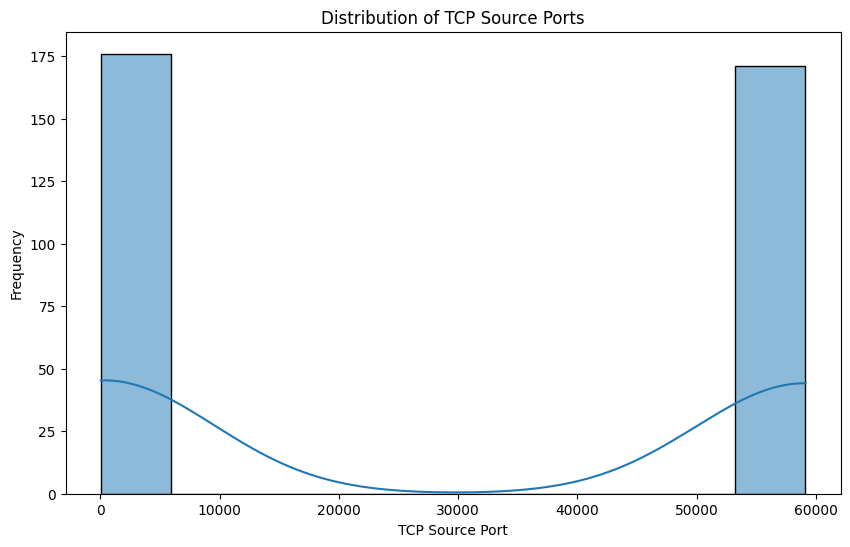

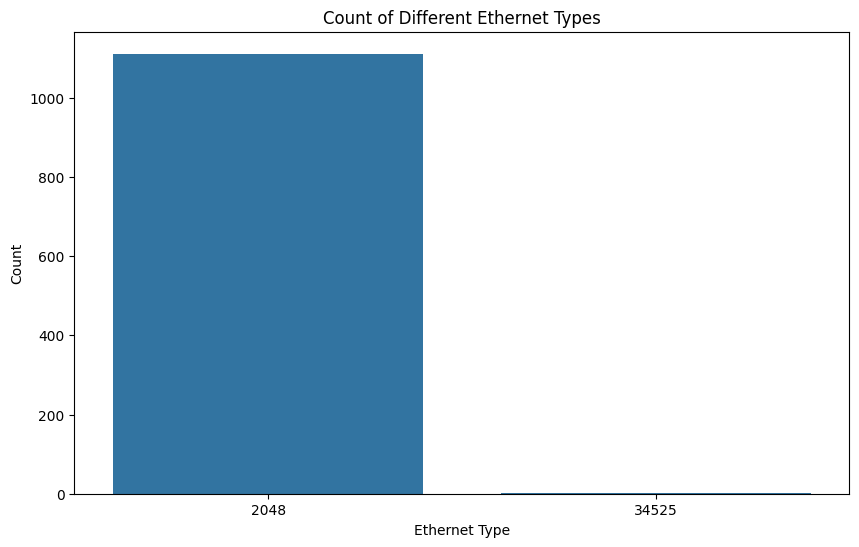

In [ ]:
# prompt: visualise the df

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already created from the previous code

# Example visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['tcp_sport'].dropna(), kde=True)
plt.title('Distribution of TCP Source Ports')
plt.xlabel('TCP Source Port')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='eth_type', data=df)
plt.title('Count of Different Ethernet Types')
plt.xlabel('Ethernet Type')
plt.ylabel('Count')
plt.show()

# More visualizations can be added as needed based on your data
# For example, scatter plots, box plots, etc.
